<a href="https://colab.research.google.com/github/Sourav-Manik/AI-Assignments/blob/main/Assignment_4_Term_deposit_prediction_(Logistic_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Import Libraries

In [ ]:
import pandas as pd
import numpy as np

#2.Import Data

In [ ]:
bank_data = pd.read_csv('/content/bank_data.csv')
bank_data.head(50)

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0
5,35,0,231,1,0,139,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
6,28,0,447,1,1,217,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
7,42,1,2,1,0,380,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,58,0,121,1,0,50,1,-1,0,0,...,0,0,1,0,0,0,0,0,0,0
9,43,0,593,1,0,55,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0


#3.Data Understanding

In [ ]:
bank_data.shape

(45211, 32)

In [ ]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45211 non-null  int64
 1   default          45211 non-null  int64
 2   balance          45211 non-null  int64
 3   housing          45211 non-null  int64
 4   loan             45211 non-null  int64
 5   duration         45211 non-null  int64
 6   campaign         45211 non-null  int64
 7   pdays            45211 non-null  int64
 8   previous         45211 non-null  int64
 9   poutfailure      45211 non-null  int64
 10  poutother        45211 non-null  int64
 11  poutsuccess      45211 non-null  int64
 12  poutunknown      45211 non-null  int64
 13  con_cellular     45211 non-null  int64
 14  con_telephone    45211 non-null  int64
 15  con_unknown      45211 non-null  int64
 16  divorced         45211 non-null  int64
 17  married          45211 non-null  int64
 18  single

In [ ]:
bank_data['pdays'].std()

100.12874599059835

In [ ]:
bank_data.isna().sum()

age                0
default            0
balance            0
housing            0
loan               0
duration           0
campaign           0
pdays              0
previous           0
poutfailure        0
poutother          0
poutsuccess        0
poutunknown        0
con_cellular       0
con_telephone      0
con_unknown        0
divorced           0
married            0
single             0
joadmin.           0
joblue.collar      0
joentrepreneur     0
johousemaid        0
jomanagement       0
joretired          0
joself.employed    0
joservices         0
jostudent          0
jotechnician       0
jounemployed       0
jounknown          0
y                  0
dtype: int64

In [ ]:
bank_data

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,0,...,0,0,0,0,0,0,1,0,0,1
45207,71,0,1729,0,0,456,2,-1,0,0,...,0,0,1,0,0,0,0,0,0,1
45208,72,0,5715,0,0,1127,5,184,3,0,...,0,0,1,0,0,0,0,0,0,1
45209,57,0,668,0,0,508,4,-1,0,0,...,0,0,0,0,0,0,0,0,0,0


#4.Data Preparation / Preprocessing

In [ ]:
#It appears data is already pre processed and assuming all the features are material

#5.Model Building

In [ ]:
X = bank_data.drop(['y'],axis = 1)
y = bank_data[['y']]

In [ ]:
X.shape, y.shape

((45211, 31), (45211, 1))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 1,shuffle = True,stratify = y)

In [ ]:
X_train.shape , y_train.shape  #training sample

((33908, 31), (33908, 1))

In [ ]:
X_test.shape , y_test.shape    #test sample

((11303, 31), (11303, 1))

#6.Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
logistic_model.coef_

array([[-1.37153732e-02, -3.27564104e-02,  1.48808821e-05,
        -1.07404593e+00, -3.08959932e-01,  3.95864516e-03,
        -3.67723261e-01,  2.26867681e-03, -2.42230281e-01,
        -2.13843565e-01, -5.55430999e-02,  4.77662644e-01,
        -6.99917496e-01,  1.00805046e-01,  7.05454943e-02,
        -6.62992057e-01,  2.56588468e-02, -2.50987913e-01,
        -2.66312450e-01, -6.59860836e-02, -3.97668385e-01,
        -3.76340075e-02, -1.35415370e-02,  2.92325532e-02,
         2.74383824e-01, -2.87828589e-02, -1.62645788e-01,
         3.13498645e-02, -1.27579875e-01,  3.69015467e-03,
         3.54062164e-03]])

In [ ]:
logistic_model.intercept_

array([-0.49170641])

#7.Model Testing

Training Accuracy

In [ ]:
y_train_pred = logistic_model.predict(X_train)

Test Accuracy

In [ ]:
y_test_pred = logistic_model.predict(X_test)

#8.Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score

Training Accuracy

In [ ]:
print(accuracy_score(y_train,y_train_pred))

0.8934174825999764


In [ ]:
print(confusion_matrix(y_train,y_train_pred))

[[29337   604]
 [ 3010   957]]


In [ ]:
confusion_matrix(y_train,y_train_pred)

array([[29337,   604],
       [ 3010,   957]])

In [ ]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     29941
           1       0.61      0.24      0.35      3967

    accuracy                           0.89     33908
   macro avg       0.76      0.61      0.64     33908
weighted avg       0.87      0.89      0.87     33908



In [ ]:
print(precision_score(y_train,y_train_pred))  #stability

0.6130685458039719


In [ ]:
print(recall_score(y_train,y_train_pred))     #accuracy

0.2412402319132846


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

#ROC - receiver operating characteristic. It is a plot between true positive rate vs false positive rates
#AUC - Area under the curve. It helps to find seperability.

fpr,tpr, thresholds = roc_curve(y,logistic_model.predict_proba (X)[:,1] )

auc = roc_auc_score(y_train,y_train_pred)
print(auc)

0.6105336124998438


Text(0, 0.5, 'True Positive Rate')

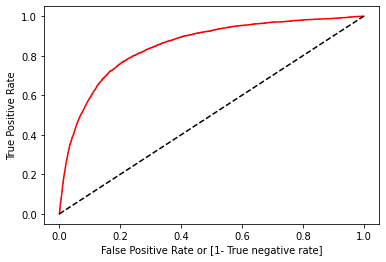

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label='logit model (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1- True negative rate]')
plt.ylabel('True Positive Rate')

Test Accuracy

In [ ]:
accuracy_score(y_test,y_test_pred)

0.891090860833407